In [26]:
#import pandas 
import pandas as pd
import numpy as np


In [5]:
#Read and view data into pandas dataframe
data = pd.read_csv("D:\DS_ML\Customer_Behavior_Analysis\customers.csv")
data.head()



<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Mukesh\AppData\Local\Temp\ipykernel_20740\551993038.py:2: SyntaxWarning: invalid escape sequence '\D'
  data = pd.read_csv("D:\DS_ML\Customer_Behavior_Analysis\customers.csv")


,CustomerID,CustomerName,Email,Gender,Age,GeographyID
0,1,Emma Anderson,emma.anderson@example.com,Male,50,2
1,2,Sarah Brown,sarah.brown@example.com,Female,37,4
2,3,Robert Hernandez,robert.hernandez@example.com,Female,26,6
3,4,David Garcia,david.garcia@example.com,Male,25,8
4,5,Emma Miller,emma.miller@example.com,Female,41,4


In [6]:
#missing value
data.isnull().sum()

CustomerID      0
CustomerName    0
Email           0
Gender          0
Age             0
GeographyID     0
dtype: int64

In [7]:
#drop the missing value
df = data.dropna().copy()


In [9]:
#check for dulpicdate
df.duplicated().sum()

np.int64(0)

In [10]:
#type cast
df.dtypes

CustomerID       int64
CustomerName    object
Email           object
Gender          object
Age              int64
GeographyID      int64
dtype: object

In [4]:
# Database set

from mysql.connector import connect as ct # type: ignore

# Create connection
connection = ct(
    host='localhost',
    port='3306',# Port should be an integer, not a string
    user='root',
    password='Shamsingh@1234',
    database='customer_analytics'  # Use 'database' instead of 'db'
)

print(connection.is_connected())  # Corrected method name

# Close the connection when you're done
connection.close()


True


In [9]:
import pandas as pd

# Load datasets into DataFrames
try:
    customers = pd.read_csv('Customers.csv')
    journey = pd.read_csv('Customer_journey.csv')
    engagement = pd.read_csv('engagement_data.csv')
    reviews = pd.read_csv('Customer_reviews.csv')
    

    # Preview data structure
    print("Customers DataFrame:")
    print(customers.head())
    
    print("\nCustomer Journey DataFrame:")
    print(journey.head())

    print("\nCustomer engagement DataFrame:")
    print(engagement.head())
    
    print("\nCustomer Reviews DataFrame:")
    print(reviews.head())

except FileNotFoundError as e:
    print(f"Error: {e}. Please check if the file exists in the specified path.")
except pd.errors.EmptyDataError:
    print("Error: One of the files is empty.")
except pd.errors.ParserError:
    print("Error: There was a problem parsing one of the files.")


Customers DataFrame:
   CustomerID      CustomerName                         Email  Gender  Age  \
0           1     Emma Anderson     emma.anderson@example.com    Male   50   
1           2       Sarah Brown       sarah.brown@example.com  Female   37   
2           3  Robert Hernandez  robert.hernandez@example.com  Female   26   
3           4      David Garcia      david.garcia@example.com    Male   25   
4           5       Emma Miller       emma.miller@example.com  Female   41   

   GeographyID  
0            2  
1            4  
2            6  
3            8  
4            4  

Customer Journey DataFrame:
   JourneyID  CustomerID  ProductID   VisitDate        Stage    Action  \
0          1          64         18  2024-06-10     Checkout  Drop-off   
1          2          94         11  2025-07-09     Checkout  Drop-off   
2          3          34          8  2024-06-14  ProductPage      View   
3          4          33         18  2025-05-28     Checkout  Drop-off   
4        

In [2]:
from textblob import TextBlob

# Analyze sentiment of review text
reviews['Sentiment'] = reviews['ReviewText'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Find negative reviews (sentiment < 0)
negative_reviews = reviews[reviews['Sentiment'] < 0]
print(negative_reviews[['ProductID', 'ReviewText']].head())


    ProductID                                        ReviewText
16          4                           Not  worth  the  money.
19          6  I  had  a  bad  experience  with  this  product.
44         16                           Not  worth  the  money.
56         10             Disappointed  with  the  performance.
64          3                           Not  worth  the  money.


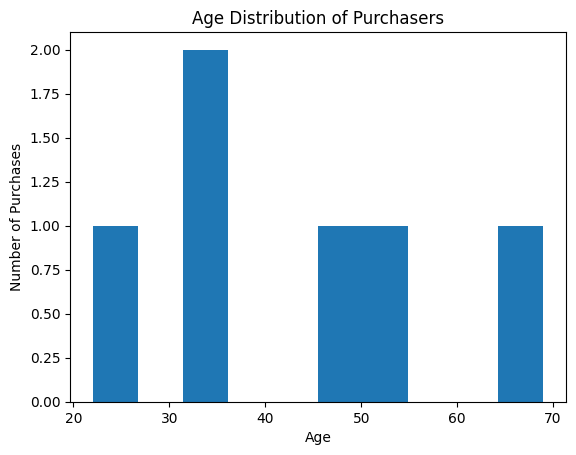

In [3]:
import matplotlib.pyplot as plt

# Plot age distribution of customers who made purchases
purchases = journey[journey['Action'] == 'Purchase']
merged_data = pd.merge(purchases, customers, on='CustomerID')

plt.hist(merged_data['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Number of Purchases')
plt.title('Age Distribution of Purchasers')
plt.show()
